## Demo for maximum separation algorithm, naive implementation

[ True  True False False False False False False False]


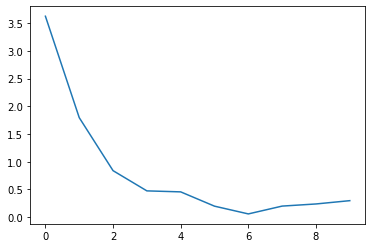

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dist_lst = np.array([10.835903, 12.665637, 13.622241, 13.987042, 14.00506,
                     14.2629175, 14.51813, 14.659249, 14.697769, 14.757356])
# approximate the background noise distance with dist_1...dist_9 with
# dist_9 repeated 10 times since the last distance's EC will never be called
gamma = np.append(dist_lst[1:], np.repeat(dist_lst[-1], 10))

sep_lst = np.abs(dist_lst - np.mean(gamma))

sep_grad = []
for i in range(9):
    grad_i = np.abs(sep_lst[i+1] - sep_lst[i])
    sep_grad.append(grad_i)

print(sep_grad > np.mean(sep_grad))

x = range(10)
#plt.plot(x, dist_lst)
plt.plot(x, sep_lst)
# plt.yscale('log')


large grads: [False  True False False False False False False False]
max_sep_i: 1


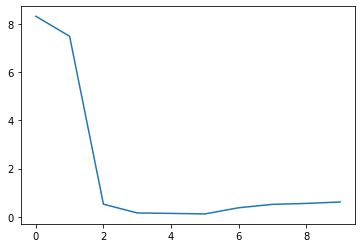

In [3]:
## speed up:
## the dist lst comes from uniref10 test split 1, id C7C422, 
# and only the first should be chosen
use_first_grad = True
opt = 0 if use_first_grad else -1
dist_lst = np.array([5.835903, 6.665637, 13.622241, 13.987042, 14.00506,
                     14.2629175, 14.51813, 14.659249, 14.697769, 14.757356])
gamma = np.append(dist_lst[1:], np.repeat(dist_lst[-1], 10))
sep_lst = np.abs(dist_lst - np.mean(gamma))
sep_grad = np.abs(sep_lst[:-1]-sep_lst[1:])
# max_sep_i = np.argmax(sep_grad)
large_grads = np.where(sep_grad > np.mean(sep_grad))
max_sep_i = large_grads[-1][opt]
print("large grads:", sep_grad > np.mean(sep_grad))
print("max_sep_i:", max_sep_i)
x = range(10)
#plt.plot(x, dist_lst)
plt.plot(x, sep_lst)
# plt.yscale('log')